In [7]:
from google.colab import files
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [14]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4' -O file.zip


--2024-09-10 08:48:47--  https://docs.google.com/uc?export=download&id=1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4
Resolving docs.google.com (docs.google.com)... 142.251.170.100, 142.251.170.138, 142.251.170.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.170.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4&export=download [following]
--2024-09-10 08:48:47--  https://drive.usercontent.google.com/download?id=1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.125.132|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.usercontent.google.com/download?id%3

In [16]:
!file file.zip


file.zip: HTML document, ASCII text, with very long lines (65536), with no line terminators


In [17]:
!pip install gdown


In [19]:
import gdown

# Google Drive file ID
file_id = "1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4"

# Google Drive download link
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Download the file
gdown.download(url, 'file.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4
From (redirected): https://drive.google.com/uc?export=download&id=1vHmNtNufzWX7s5MFX9sIvTBm8mkn4Ek4&confirm=t&uuid=928a24fc-8471-4a03-a91a-068899c6aa7c
To: /content/file.zip
100%|██████████| 156M/156M [00:06<00:00, 24.2MB/s]


'file.zip'

In [20]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile('file.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_data')

# Check the extracted files
print(os.listdir('extracted_data'))


['Testing', 'Training']


In [21]:
print(os.listdir('extracted_data'))

['Testing', 'Training']


In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_dir = 'extracted_data/Training'
test_dir = 'extracted_data/Testing'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output classes (glioma, meningioma, notumor, pituitary)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.5276 - loss: 1.0342 - val_accuracy: 0.6369 - val_loss: 1.1622
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.7335 - loss: 0.6715 - val_accuracy: 0.7170 - val_loss: 0.8177
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.7804 - loss: 0.5550 - val_accuracy: 0.7399 - val_loss: 0.7521
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8094 - loss: 0.4966 - val_accuracy: 0.7963 - val_loss: 0.4916
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8284 - loss: 0.4545 - val_accuracy: 0.7780 - val_loss: 0.5931
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.8448 - loss: 0.4041 - val_accuracy: 0.8169 - val_loss: 0.4522
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8423 - loss: 0.3946 - val_accuracy: 0.7208 - val_loss: 0.8478
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.8703 - loss: 0.3523 - val_accu

In [26]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 538ms/step - accuracy: 0.1633 - loss: 1.3907
Test Accuracy: 18.15%


41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 607ms/step


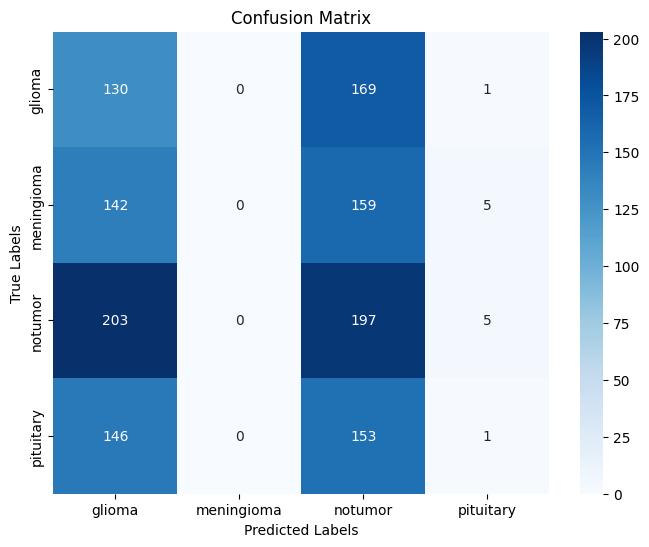

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Generate predictions
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()


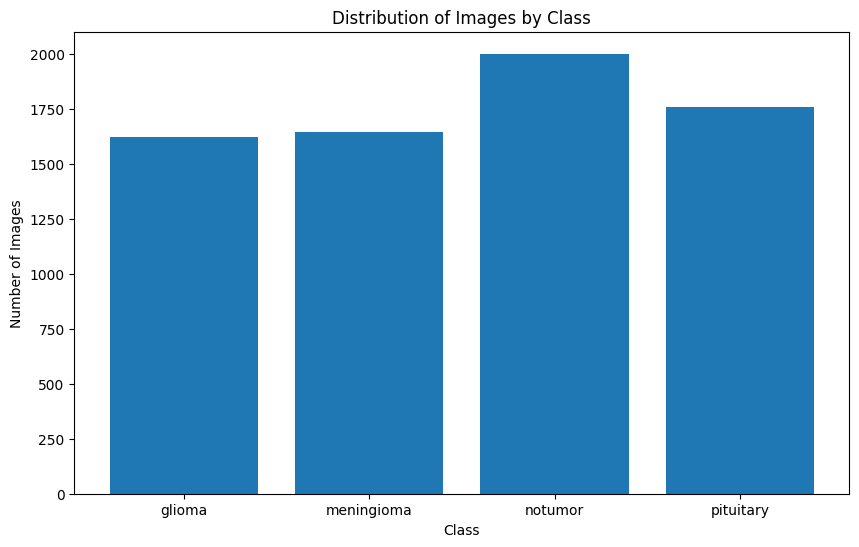

In [32]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset
data_path = 'extracted_data'

# Define the class names and subdirectories
subdirectories = ['Testing', 'Training']
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Initialize class counts
class_counts = {class_name: 0 for class_name in class_names}

# Count the number of images in each class for each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(data_path, subdir)
    for class_name in class_names:
        class_dir = os.path.join(subdir_path, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] += len(os.listdir(class_dir))
        else:
            print(f"Directory '{class_dir}' does not exist.")

# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Class')
plt.show()


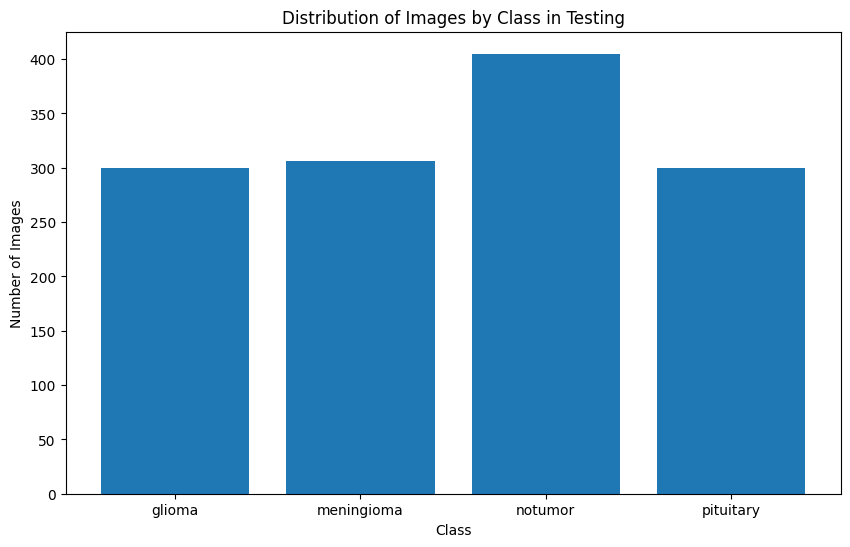

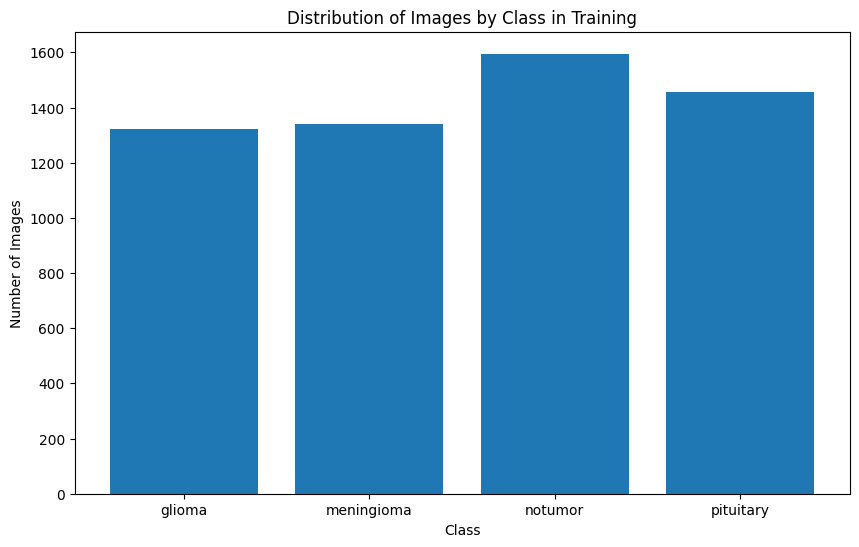

In [33]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset
data_path = 'extracted_data'

# Define the class names and subdirectories
subdirectories = ['Testing', 'Training']
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Plot distribution for each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(data_path, subdir)
    class_counts = {class_name: 0 for class_name in class_names}

    for class_name in class_names:
        class_dir = os.path.join(subdir_path, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
        else:
            print(f"Directory '{class_dir}' does not exist.")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(f'Distribution of Images by Class in {subdir}')
    plt.show()


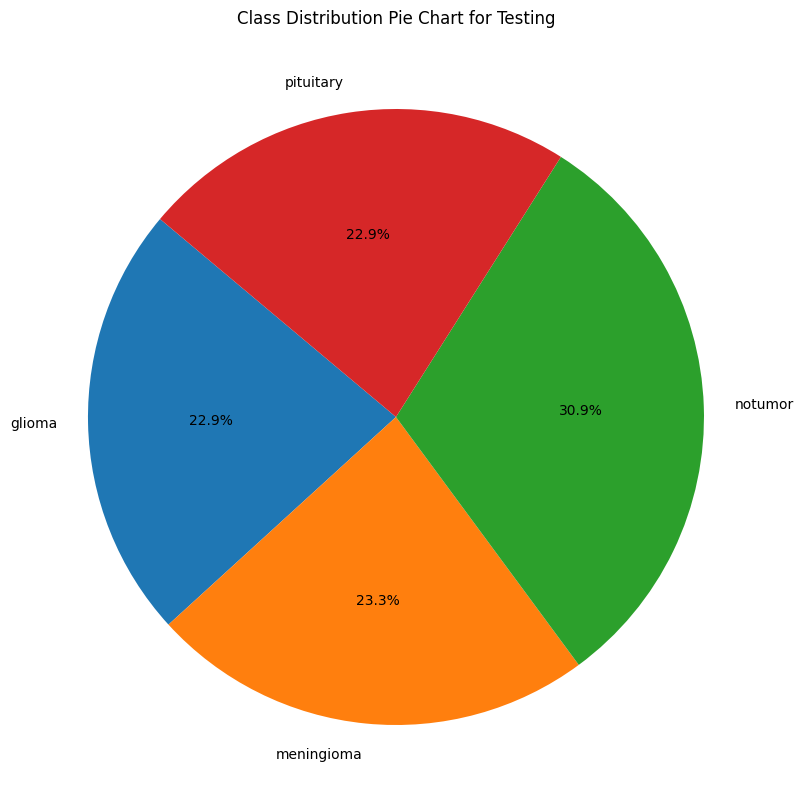

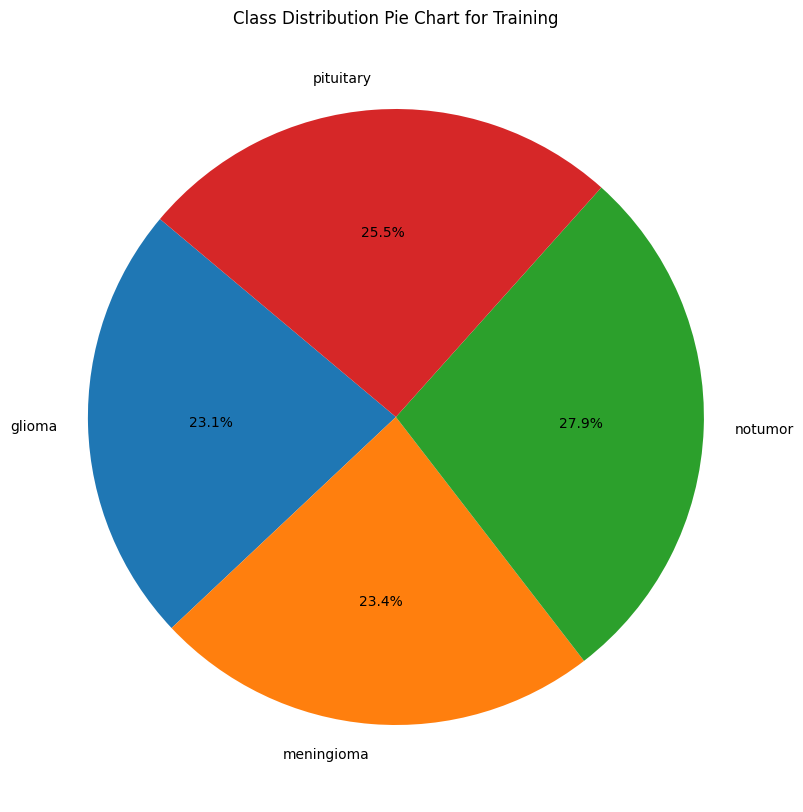

In [34]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset
data_path = 'extracted_data'

# Define the class names and subdirectories
subdirectories = ['Testing', 'Training']
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Plot pie chart for each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(data_path, subdir)
    class_counts = {class_name: 0 for class_name in class_names}

    for class_name in class_names:
        class_dir = os.path.join(subdir_path, class_name)
        if os.path.exists(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
        else:
            print(f"Directory '{class_dir}' does not exist.")

    # Plot
    plt.figure(figsize=(10, 10))
    plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Class Distribution Pie Chart for {subdir}')
    plt.show()


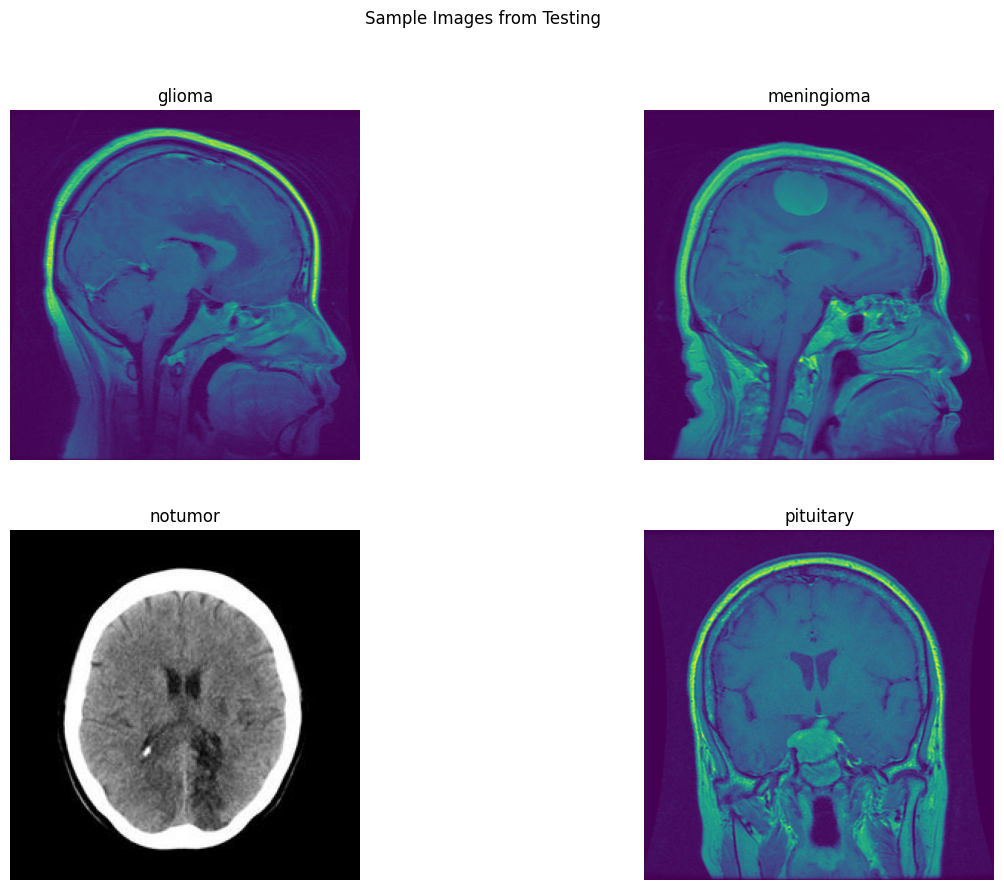

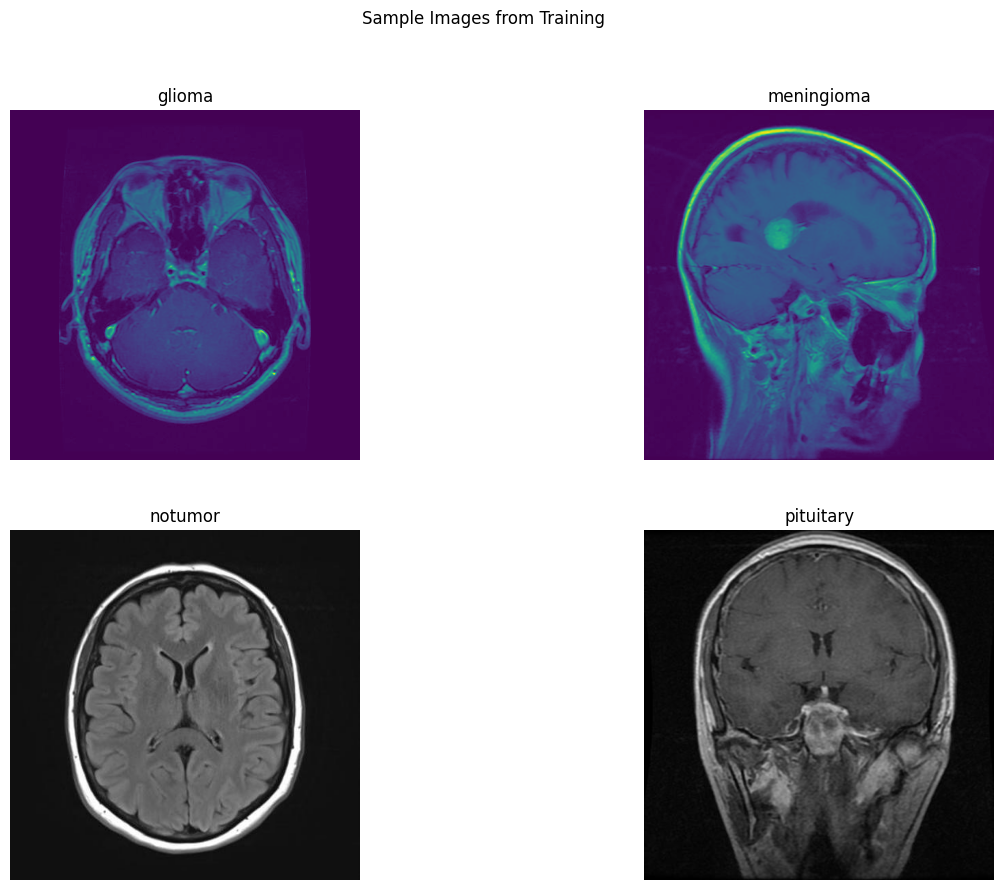

In [36]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset
data_path = 'extracted_data'

# Define the class names and subdirectories
subdirectories = ['Testing', 'Training']
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Plot sample images for each subdirectory
for subdir in subdirectories:
    subdir_path = os.path.join(data_path, subdir)
    plt.figure(figsize=(15, 10))

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(subdir_path, class_name)
        if os.path.exists(class_dir):
            sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])  # Get the first image
            image = Image.open(sample_image_path)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')
        else:
            print(f"Directory '{class_dir}' does not exist.")

    plt.suptitle(f'Sample Images from {subdir}')
    plt.show()


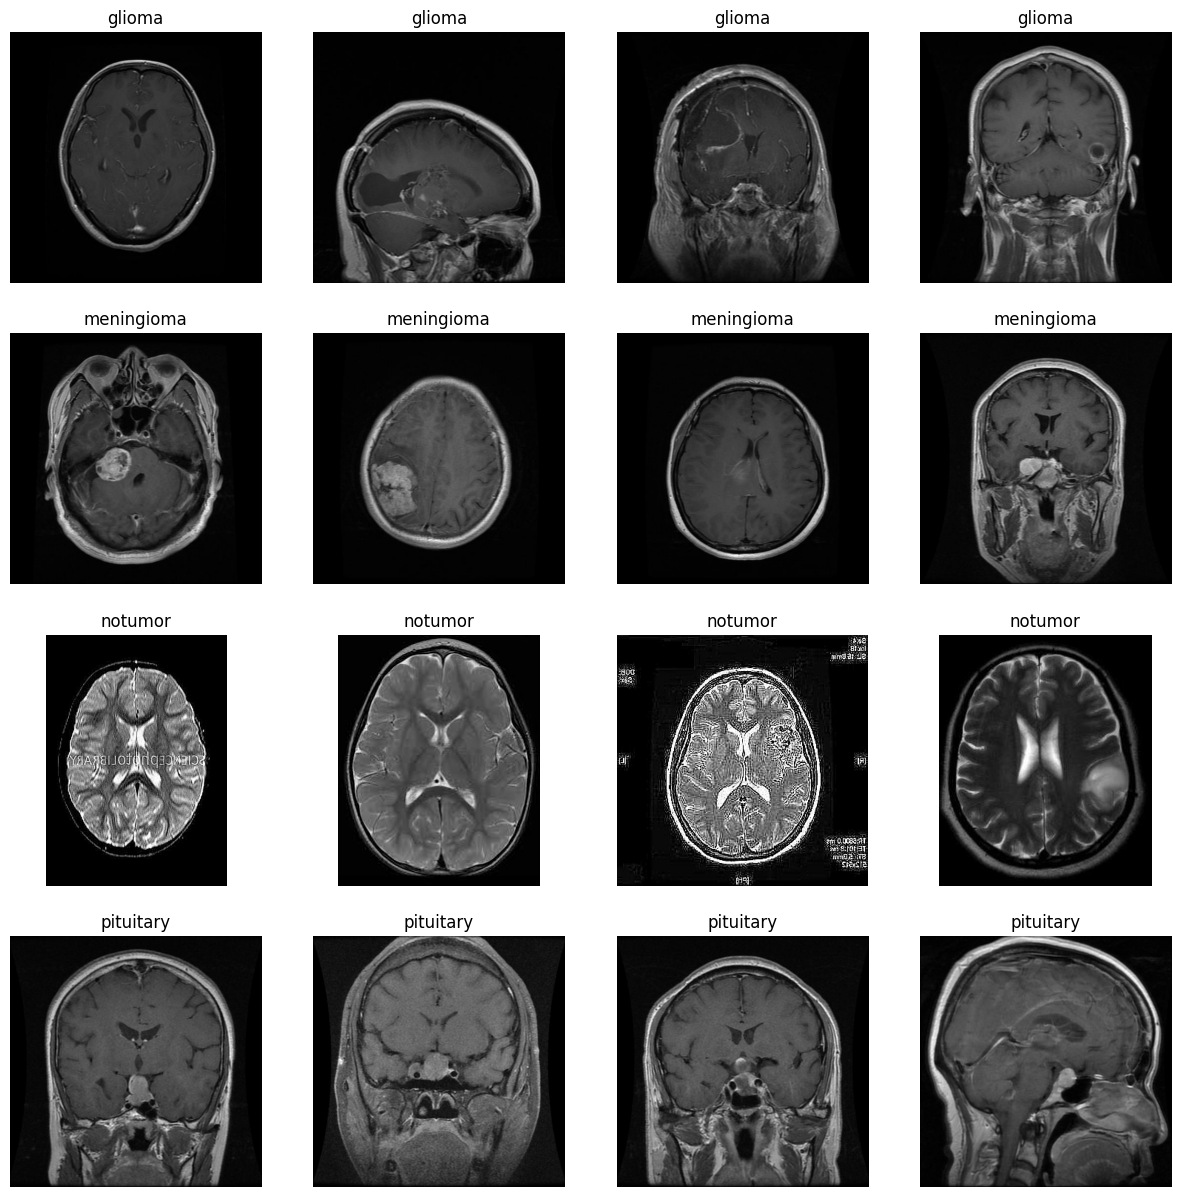

In [39]:
import matplotlib.pyplot as plt
import cv2
import os
import random

def display_sample_images(data_path, classes, num_images=4):
    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(classes):
        class_folder = os.path.join(data_path, class_name)
        sample_images = random.sample(os.listdir(class_folder), num_images)

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(classes), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{class_name}")

    plt.show()

# Display sample images from 'Training' folder
display_sample_images(train_path, class_names)


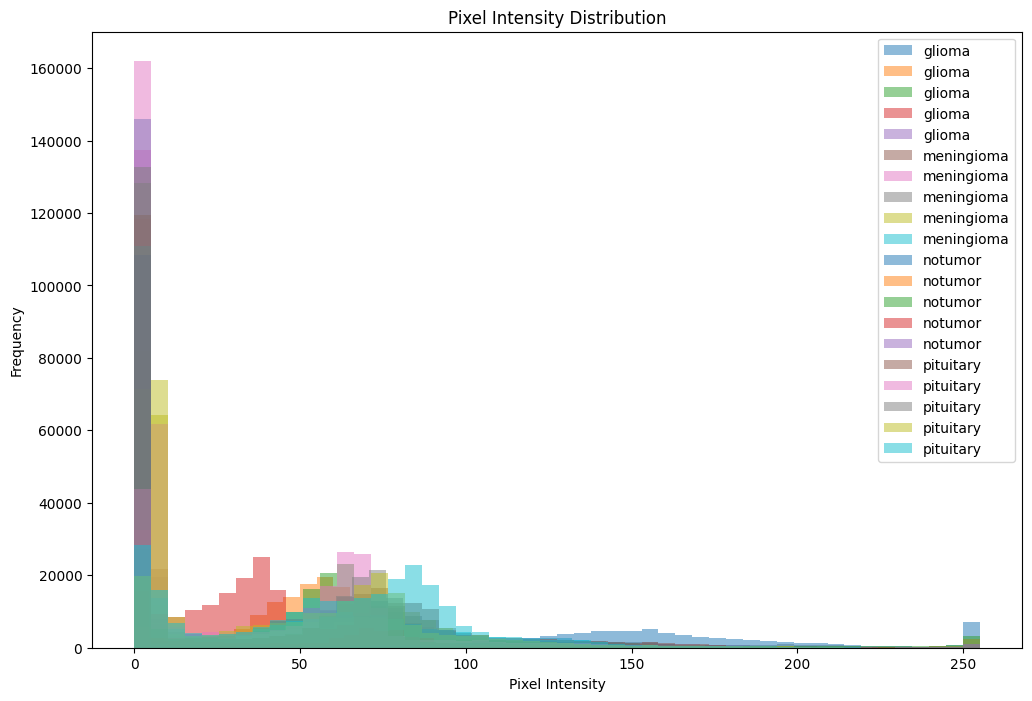

In [40]:
import numpy as np

def plot_image_intensity_distribution(data_path, classes, num_samples=5):
    plt.figure(figsize=(12, 8))

    for class_name in classes:
        class_folder = os.path.join(data_path, class_name)
        sample_images = random.sample(os.listdir(class_folder), num_samples)

        for img_name in sample_images:
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
            img_flat = img.flatten()

            plt.hist(img_flat, bins=50, alpha=0.5, label=f"{class_name}")

    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot image intensity distribution from 'Training' folder
plot_image_intensity_distribution(train_path, class_names)


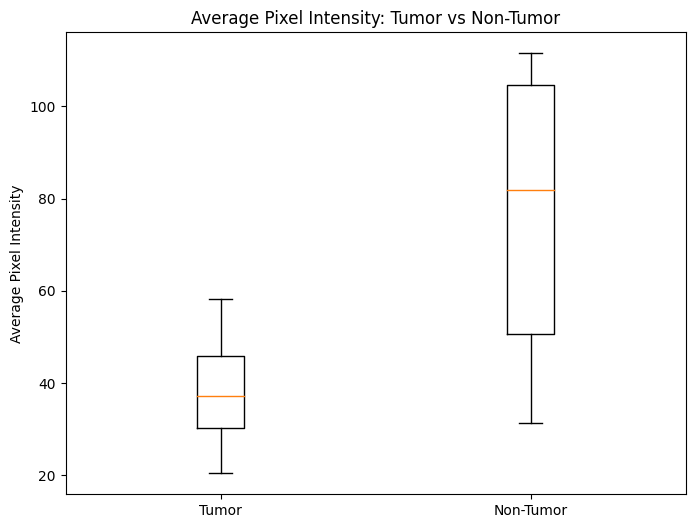

In [41]:
def compare_tumor_non_tumor_intensity(data_path, tumor_classes, non_tumor_class, num_samples=10):
    tumor_intensity = []
    non_tumor_intensity = []

    # Tumor Classes
    for class_name in tumor_classes:
        class_folder = os.path.join(data_path, class_name)
        sample_images = random.sample(os.listdir(class_folder), num_samples)

        for img_name in sample_images:
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            tumor_intensity.append(np.mean(img))

    # Non-Tumor Class
    non_tumor_folder = os.path.join(data_path, non_tumor_class)
    sample_images = random.sample(os.listdir(non_tumor_folder), num_samples)

    for img_name in sample_images:
        img_path = os.path.join(non_tumor_folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        non_tumor_intensity.append(np.mean(img))

    # Plot
    plt.figure(figsize=(8, 6))
    plt.boxplot([tumor_intensity, non_tumor_intensity], labels=['Tumor', 'Non-Tumor'])
    plt.title('Average Pixel Intensity: Tumor vs Non-Tumor')
    plt.ylabel('Average Pixel Intensity')
    plt.show()

# Compare tumor vs non-tumor from 'Training' folder
tumor_classes = ['glioma', 'meningioma', 'pituitary']
compare_tumor_non_tumor_intensity(train_path, tumor_classes, 'notumor')


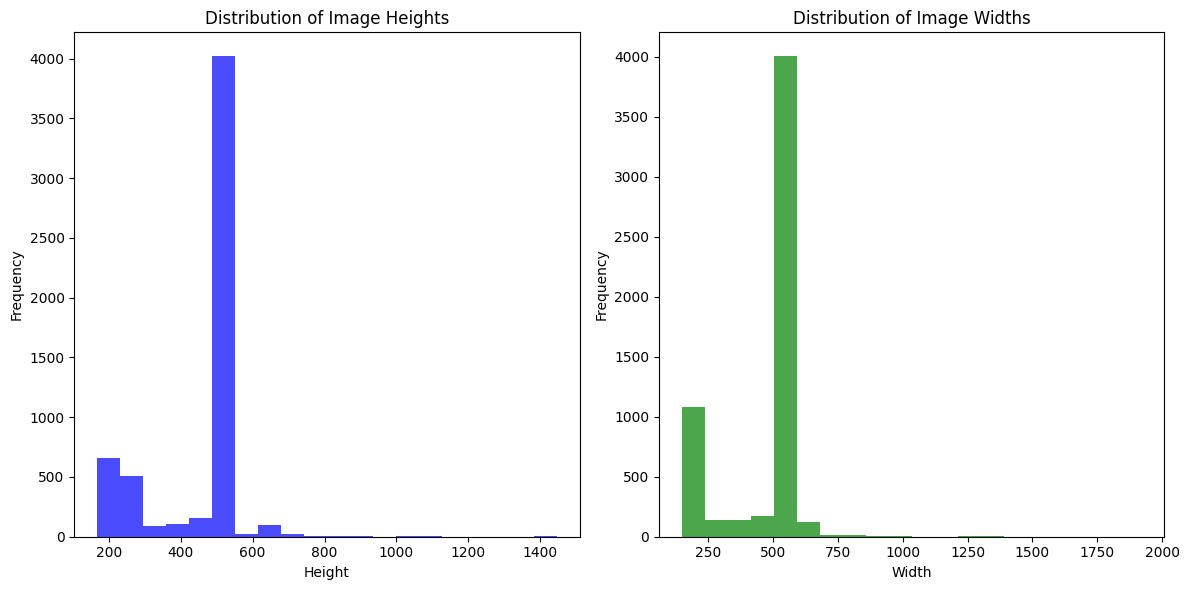

In [43]:
# Define the paths to the 'Training' and 'Testing' directories
train_path = os.path.join(data_path, 'Training')
test_path = os.path.join(data_path, 'Testing')

# Now run the rest of the code
train_dimensions = get_image_dimensions(train_path)
test_dimensions = get_image_dimensions(test_path)

# Extract height and width
heights = [dim[0] for dim in train_dimensions]
widths = [dim[1] for dim in train_dimensions]

# Plot the distribution of heights and widths
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



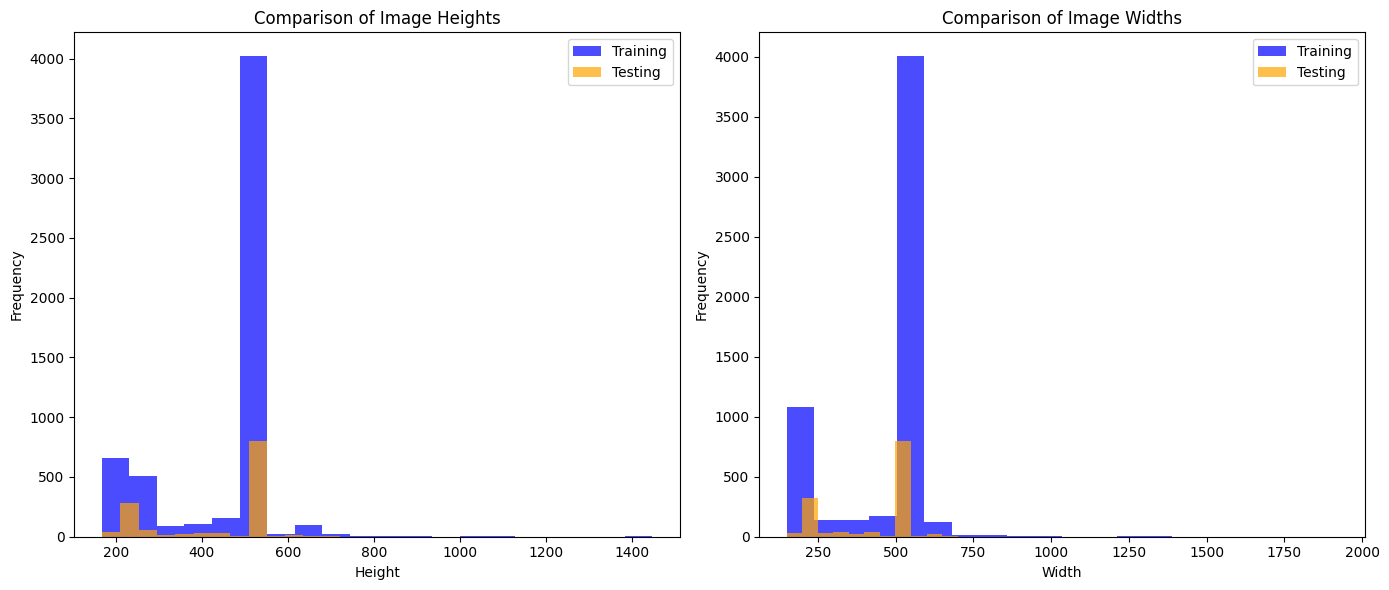

In [44]:
# Define the paths to the 'Training' and 'Testing' directories
train_path = os.path.join(data_path, 'Training')
test_path = os.path.join(data_path, 'Testing')

# Function to get image dimensions for all images in a directory
def get_image_dimensions(folder_path):
    dimensions = []
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                img = Image.open(image_path)
                dimensions.append(img.size)
            except:
                continue
    return dimensions

# Get dimensions of images in the 'Training' and 'Testing' directories
train_dimensions = get_image_dimensions(train_path)
test_dimensions = get_image_dimensions(test_path)

# Extract height and width for both datasets
train_heights = [dim[1] for dim in train_dimensions]
train_widths = [dim[0] for dim in train_dimensions]

test_heights = [dim[1] for dim in test_dimensions]
test_widths = [dim[0] for dim in test_dimensions]

# Plot the comparison of image heights
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(train_heights, bins=20, color='blue', alpha=0.7, label='Training')
plt.hist(test_heights, bins=20, color='orange', alpha=0.7, label='Testing')
plt.title('Comparison of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()

# Plot the comparison of image widths
plt.subplot(1, 2, 2)
plt.hist(train_widths, bins=20, color='blue', alpha=0.7, label='Training')
plt.hist(test_widths, bins=20, color='orange', alpha=0.7, label='Testing')
plt.title('Comparison of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


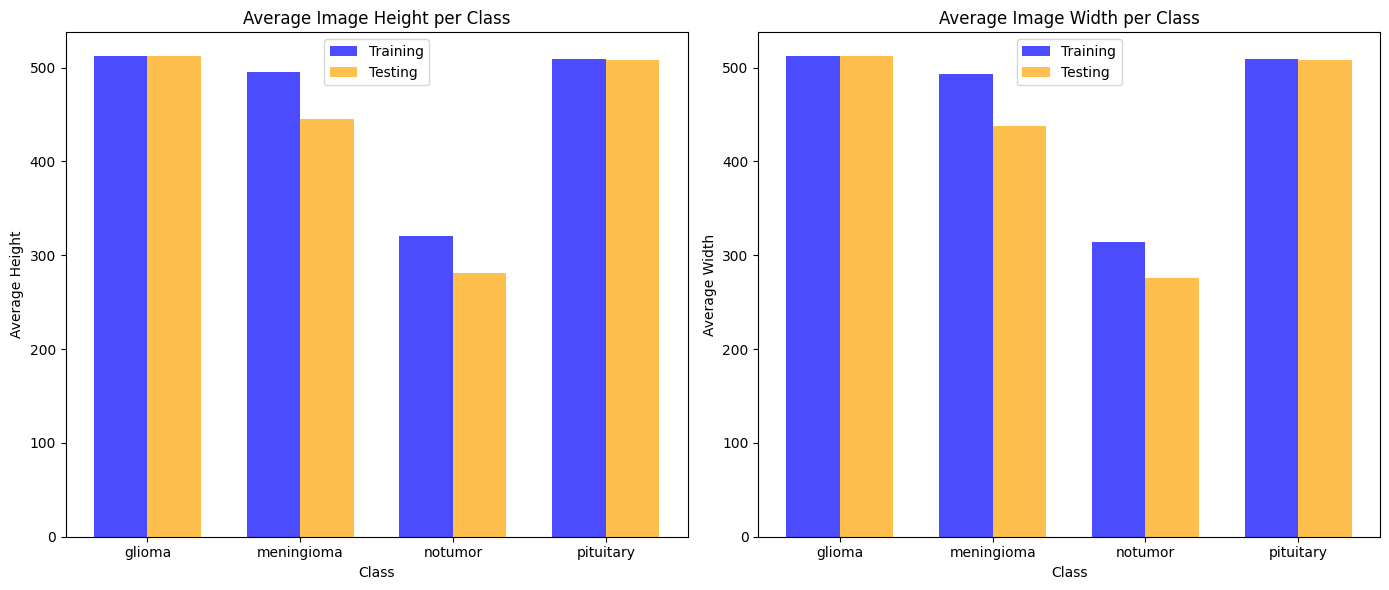

In [45]:
# Define the paths to the 'Training' and 'Testing' directories
train_path = os.path.join(data_path, 'Training')
test_path = os.path.join(data_path, 'Testing')

# Function to calculate average image dimensions for a given class
def get_average_image_size(folder_path):
    class_avg_size = {}
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        total_width, total_height, num_images = 0, 0, 0
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                img = Image.open(image_path)
                width, height = img.size
                total_width += width
                total_height += height
                num_images += 1
            except:
                continue
        if num_images > 0:
            avg_width = total_width / num_images
            avg_height = total_height / num_images
            class_avg_size[class_name] = (avg_width, avg_height)
    return class_avg_size

# Calculate average sizes for both Training and Testing sets
train_avg_size = get_average_image_size(train_path)
test_avg_size = get_average_image_size(test_path)

# Separate the width and height for plotting
train_avg_heights = [train_avg_size[class_name][1] for class_name in class_names]
train_avg_widths = [train_avg_size[class_name][0] for class_name in class_names]

test_avg_heights = [test_avg_size[class_name][1] for class_name in class_names]
test_avg_widths = [test_avg_size[class_name][0] for class_name in class_names]

# Plotting average heights and widths per class
plt.figure(figsize=(14, 6))

# Plot for heights
plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(class_names))
plt.bar(index, train_avg_heights, bar_width, label='Training', color='blue', alpha=0.7)
plt.bar(index + bar_width, test_avg_heights, bar_width, label='Testing', color='orange', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Average Height')
plt.title('Average Image Height per Class')
plt.xticks(index + bar_width / 2, class_names)
plt.legend()

# Plot for widths
plt.subplot(1, 2, 2)
plt.bar(index, train_avg_widths, bar_width, label='Training', color='blue', alpha=0.7)
plt.bar(index + bar_width, test_avg_widths, bar_width, label='Testing', color='orange', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Average Width')
plt.title('Average Image Width per Class')
plt.xticks(index + bar_width / 2, class_names)
plt.legend()

plt.tight_layout()
plt.show()


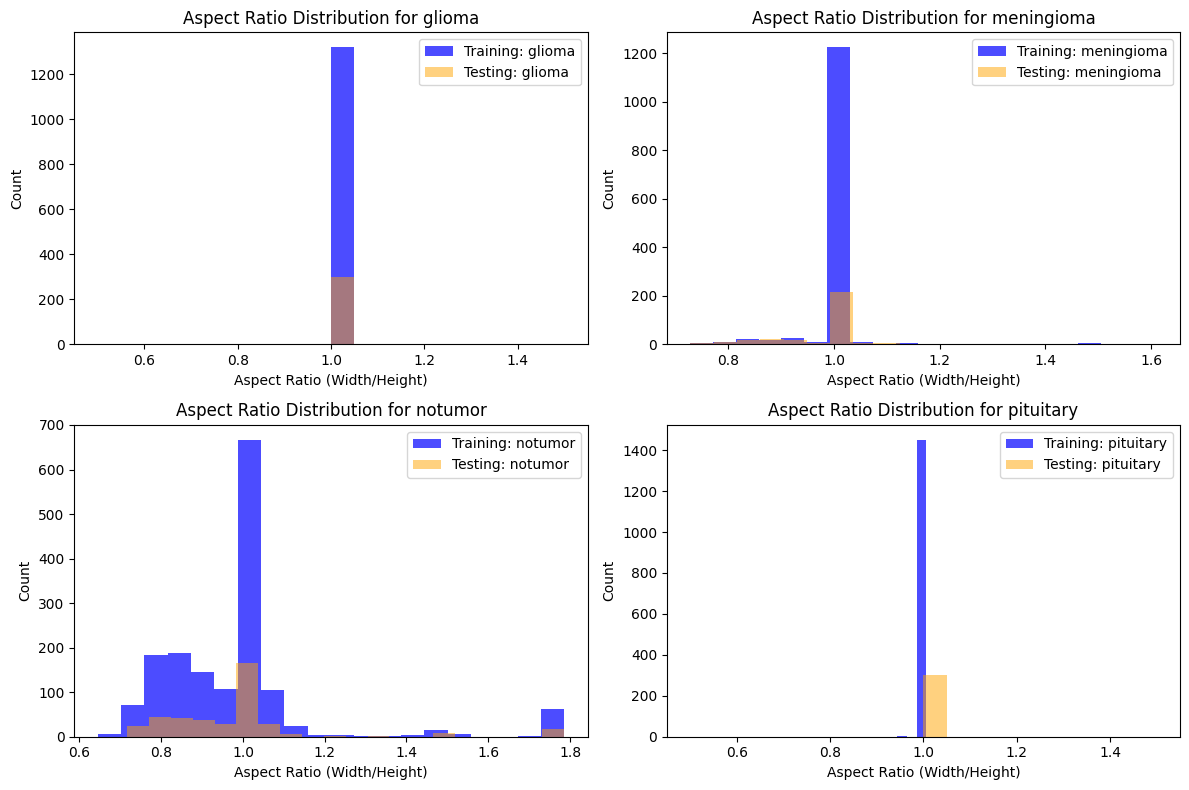

In [46]:
# Function to calculate aspect ratios for each class
def get_aspect_ratios(folder_path):
    class_aspect_ratios = {}
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        aspect_ratios = []
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                img = Image.open(image_path)
                width, height = img.size
                aspect_ratio = width / height
                aspect_ratios.append(aspect_ratio)
            except:
                continue
        class_aspect_ratios[class_name] = aspect_ratios
    return class_aspect_ratios

# Get aspect ratios for Training and Testing sets
train_aspect_ratios = get_aspect_ratios(train_path)
test_aspect_ratios = get_aspect_ratios(test_path)

# Plot aspect ratio distribution for each class in Training set
plt.figure(figsize=(12, 8))

for idx, class_name in enumerate(class_names):
    plt.subplot(2, 2, idx + 1)
    plt.hist(train_aspect_ratios[class_name], bins=20, color='blue', alpha=0.7, label=f'Training: {class_name}')
    plt.hist(test_aspect_ratios[class_name], bins=20, color='orange', alpha=0.5, label=f'Testing: {class_name}')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Count')
    plt.title(f'Aspect Ratio Distribution for {class_name}')
    plt.legend()

plt.tight_layout()
plt.show()


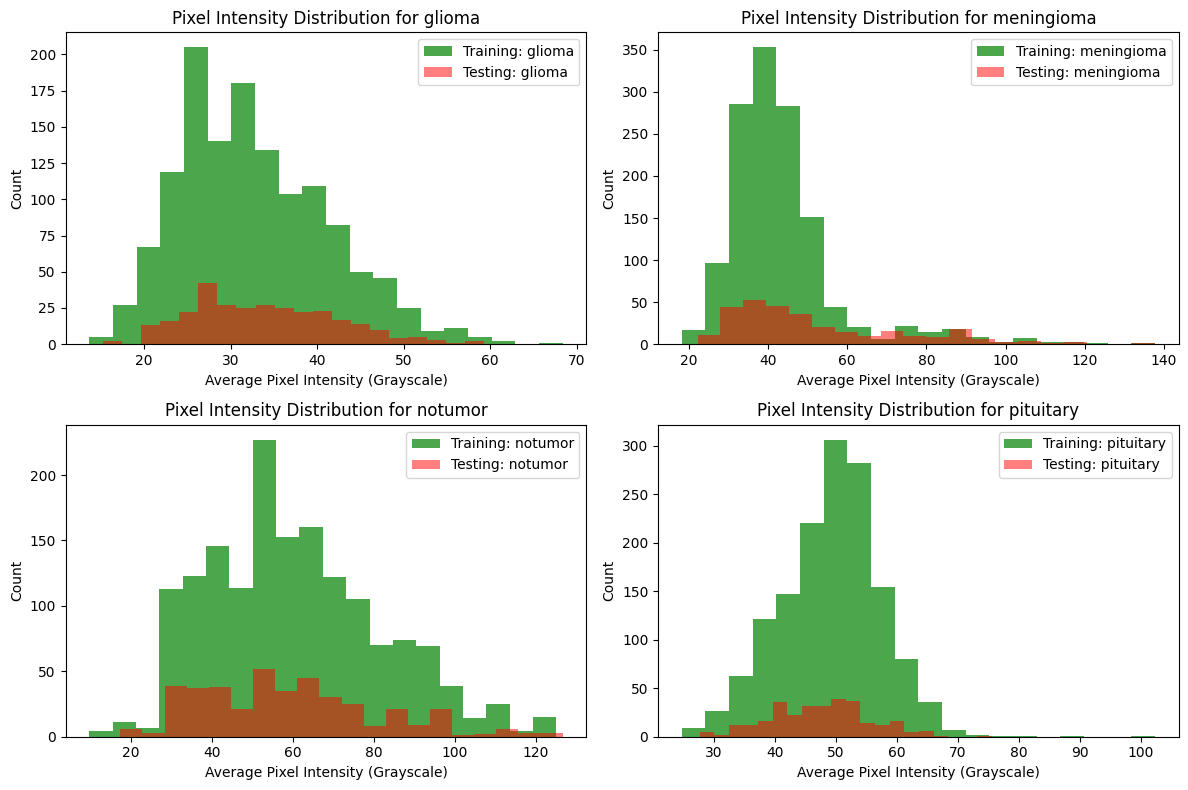

In [47]:
# Function to calculate pixel intensities for each class
def get_pixel_intensities(folder_path):
    class_pixel_intensities = {}
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        pixel_intensities = []
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                # Open image and convert to grayscale
                img = Image.open(image_path).convert('L')
                img_array = np.array(img)

                # Calculate the mean pixel intensity
                mean_intensity = np.mean(img_array)
                pixel_intensities.append(mean_intensity)
            except:
                continue
        class_pixel_intensities[class_name] = pixel_intensities
    return class_pixel_intensities

# Get pixel intensities for Training and Testing sets
train_pixel_intensities = get_pixel_intensities(train_path)
test_pixel_intensities = get_pixel_intensities(test_path)

# Plot pixel intensity distribution for each class in Training set
plt.figure(figsize=(12, 8))

for idx, class_name in enumerate(class_names):
    plt.subplot(2, 2, idx + 1)
    plt.hist(train_pixel_intensities[class_name], bins=20, color='green', alpha=0.7, label=f'Training: {class_name}')
    plt.hist(test_pixel_intensities[class_name], bins=20, color='red', alpha=0.5, label=f'Testing: {class_name}')
    plt.xlabel('Average Pixel Intensity (Grayscale)')
    plt.ylabel('Count')
    plt.title(f'Pixel Intensity Distribution for {class_name}')
    plt.legend()

plt.tight_layout()
plt.show()


In [48]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def plot_sample_images_with_labels(folder_path, class_names, num_samples=5):
    plt.figure(figsize=(15, 10))
    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_folder)
        sample_files = image_files[:num_samples]  # Select a few samples

        for i, image_file in enumerate(sample_files):
            img = Image.open(os.path.join(class_folder, image_file))
            plt.subplot(len(class_names), num_samples, idx * num_samples + i + 1)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.title(class_name)

    plt.tight_layout()
    plt.show()

# Plot sample images from Training set
plot_sample_images_with_labels(train_path, class_names)


In [50]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

def plot_confusion_matrix_with_images(y_true, y_pred, class_names, image_paths, num_samples=3):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted')
    plt.ylabel('True')

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            if cm[i, j] > 0:
                sample_images = np.random.choice(image_paths[i], num_samples)
                plt.figure(figsize=(15, 5))
                for k, image_path in enumerate(sample_images):
                    img = Image.open(image_path)
                    plt.subplot(1, num_samples, k + 1)
                    plt.imshow(img)
                    plt.axis('off')
                    plt.title(f'Pred: {class_names[j]}')

                plt.suptitle(f'True: {class_names[i]}')
                plt.show()

# Assuming y_true, y_pred, and image_paths are available


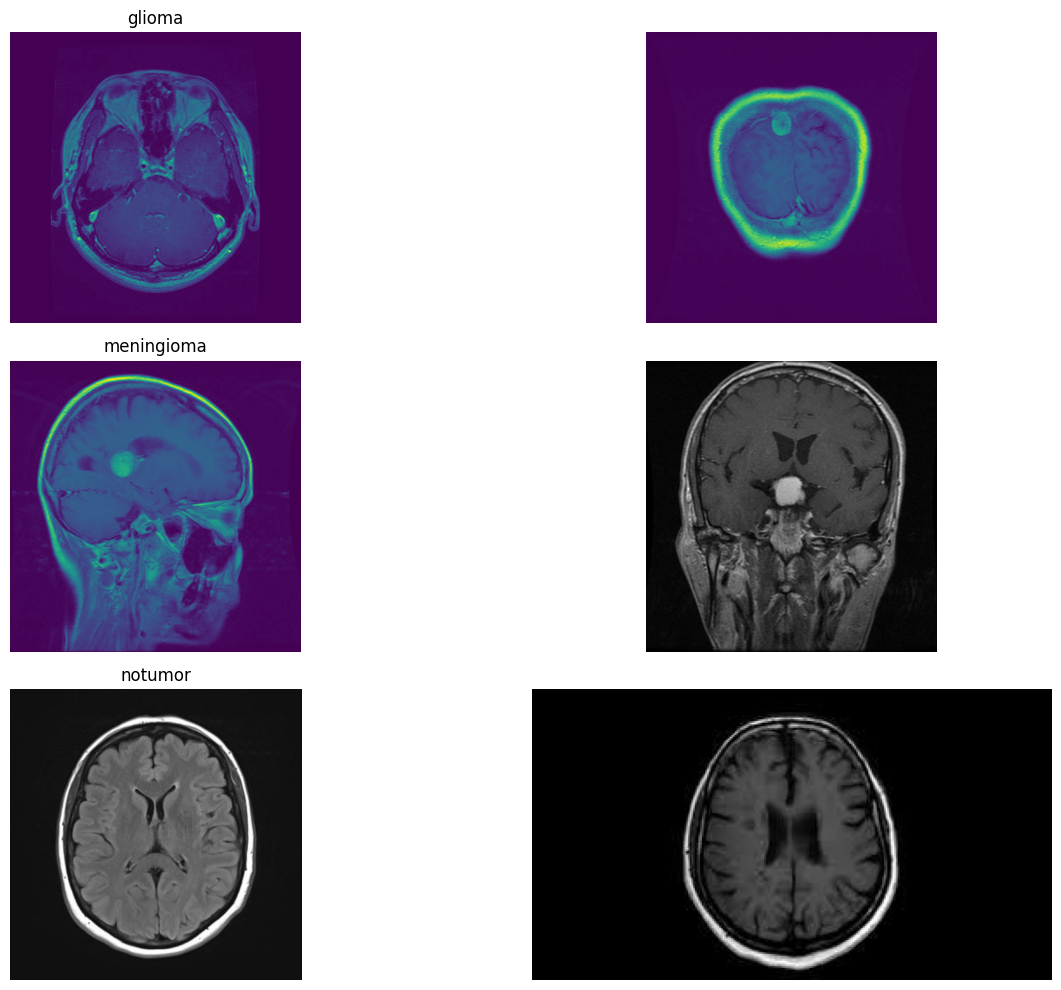

In [51]:
def plot_image_pairs(folder_path, class_names, num_pairs=3):
    plt.figure(figsize=(15, 10))
    for i in range(num_pairs):
        for j in range(2):
            class_name = class_names[i % len(class_names)]
            image_file = os.listdir(os.path.join(folder_path, class_name))[j]
            img = Image.open(os.path.join(folder_path, class_name, image_file))
            plt.subplot(num_pairs, 2, i * 2 + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.title(class_name)

    plt.tight_layout()
    plt.show()

# Plot image pairs from Training set
plot_image_pairs(train_path, class_names)


In [52]:
def plot_image_statistics(folder_path, class_names):
    plt.figure(figsize=(15, 10))
    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_folder)
        sample_files = image_files[:5]  # Select a few samples

        for i, image_file in enumerate(sample_files):
            img = Image.open(os.path.join(class_folder, image_file))
            img_array = np.array(img.convert('L'))
            avg_intensity = np.mean(img_array)
            plt.subplot(len(class_names), 5, idx * 5 + i + 1)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.title(f'{class_name}\nAvg Intensity: {avg_intensity:.2f}')

    plt.tight_layout()
    plt.show()

# Plot image statistics from Training set
plot_image_statistics(train_path, class_names)


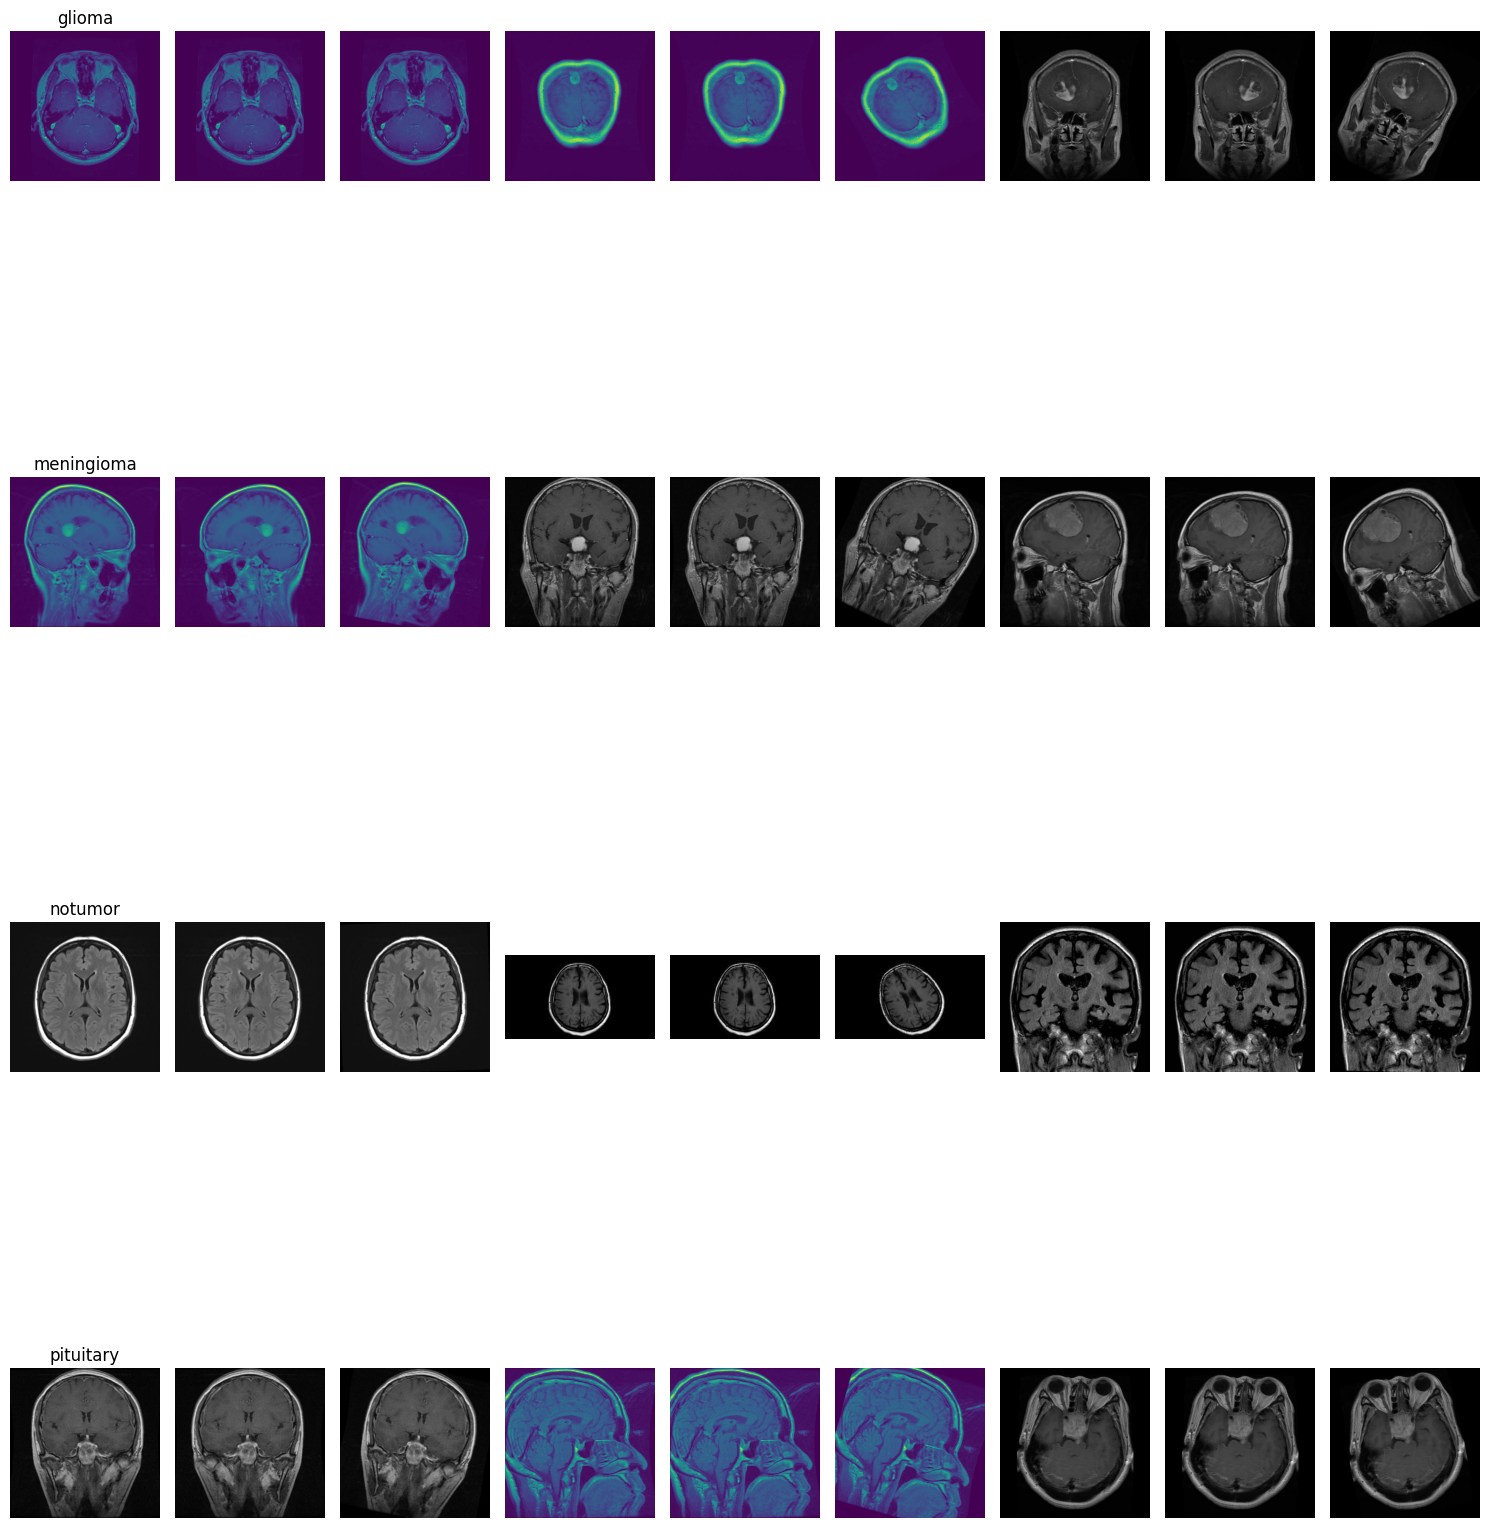

In [54]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import RandomHorizontalFlip, RandomRotation

def plot_augmented_images(folder_path, class_names, augmentations, num_samples=3):
    num_augmentations = len(augmentations)
    plt.figure(figsize=(15, 5 * len(class_names)))

    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_folder)
        sample_files = image_files[:num_samples]  # Select a few samples

        for i, image_file in enumerate(sample_files):
            img = Image.open(os.path.join(class_folder, image_file))

            # Plot original image
            plt.subplot(len(class_names), num_samples * (num_augmentations + 1), idx * (num_samples * (num_augmentations + 1)) + i * (num_augmentations + 1) + 1)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.title(f'{class_name}')

            # Plot augmented images
            for j, augmentation in enumerate(augmentations):
                augmented_img = augmentation(img)
                plt.subplot(len(class_names), num_samples * (num_augmentations + 1), idx * (num_samples * (num_augmentations + 1)) + i * (num_augmentations + 1) + j + 2)
                plt.imshow(augmented_img)
                plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define augmentations
augmentations = [RandomHorizontalFlip(), RandomRotation(30)]

# Plot augmented images from Training set
plot_augmented_images(train_path, class_names, augmentations)

